In [5]:
from os import listdir
import numpy as np
from matplotlib import image
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C:/Users/admin/Desktop/midvi s3/Image mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))

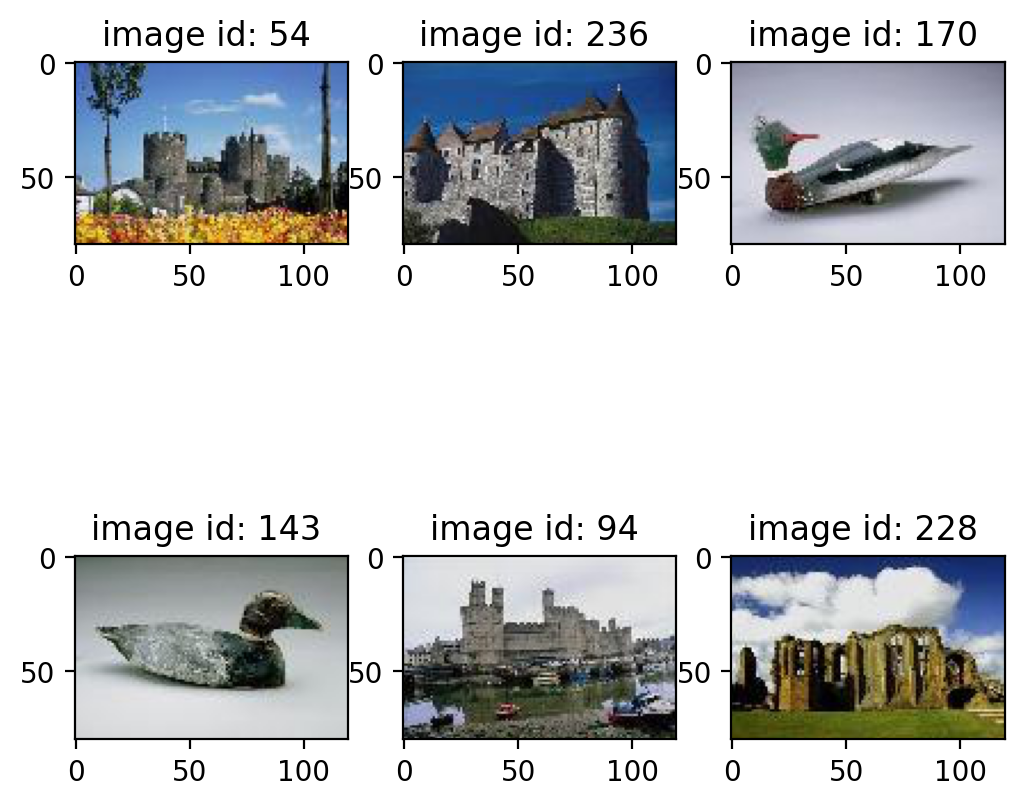

In [6]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

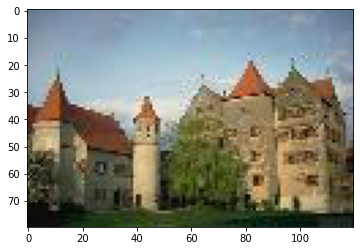

In [7]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/im.jpeg')
plt.imshow(img_requete) 

In [8]:
def color_Moments(img):
    colorFeatures=np.zeros(6)
    colorFeatures[0]=np.mean(img[:,:,0])
    colorFeatures[1]=np.mean(img[:,:,1])
    colorFeatures[2]=np.mean(img[:,:,2])
    colorFeatures[3]=np.std(img[:,:,0])
    colorFeatures[4]=np.std(img[:,:,1])
    colorFeatures[5]=np.std(img[:,:,2])
    return colorFeatures

In [9]:
img_requete
color_Moments(img_requete)

array([123.77979167, 126.5609375 , 114.24333333,  52.4587144 ,
        55.78731034,  71.32690701])

In [10]:
def CBIR_Indexation():
    features=np.zeros([len(loaded_images),6])
    for i in range (len(loaded_images)):
        features[i]=color_Moments(loaded_images[i])
    return features

In [11]:
index_Matrix=CBIR_Indexation()
# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
print (index_Matrix.shape)
print(index_Matrix)

(270, 6)
[[130.70520833 135.18479167 132.65145833  57.08014992  57.35566866
   67.15136647]
 [131.61010417 131.5675     102.95052083  40.58993566  43.30415716
   56.16750571]
 [ 96.97625    115.30354167  79.69760417  40.18884923  43.67417653
   62.04243771]
 ...
 [117.88802083 115.13614583 107.6253125   68.48269902  73.77012512
   76.39358424]
 [ 88.4425     108.62177083 101.8390625   53.07985362  65.76802482
   80.46930726]
 [ 98.40104167 102.06520833 102.85208333  44.06644839  40.57894464
   57.66920029]]


In [12]:
import scipy.spatial.distance as dist

def CBIR_Recherche(Imreq,ind_Matrix):
    distances = {}
    for i in range(len(loaded_images)):
       
        distances[i]=dist.euclidean(Imreq,ind_Matrix[i])
        
        distance=dict(sorted(distances.items(),key=lambda x: x[1]))
    return distance


[123.77979167 126.5609375  114.24333333  52.4587144   55.78731034
  71.32690701]


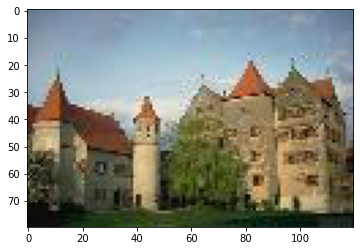

In [17]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/im.jpeg')
plt.imshow(img_requete) 
Imreq=color_Moments(img_requete)
print(Imreq)

distanes_CBIR=CBIR_Recherche(Imreq,index_Matrix)

In [14]:
print (index_Matrix.shape)

(270, 6)


In [15]:
result = distanes_CBIR.keys()
  
# Convert object to a list
data = list(result)
  
# Convert list to an array
arraydistance = np.array(data)
  
# print the numpy array
print(arraydistance)

[ 47  51  82  49  18  17 233   5   4  41  81  65  55 227 100  34 246  60
  40 226 120  12 248   0  33 132 106  67  54  50  99  16  24 241  61  91
 232 222  86 256 123  89   1  93  44  53 175 243  64 110 267 255 124  85
  58  59 135 105 257 264  84 160  57 229  62  52 250 228  79  23  13  97
   6 154  20  11 238  56 262 118   7  26 121  15 265 125 239 145 235  90
 131  46 183 242 249 174 225  28 187 159 168 247 200  75  94 117 114  95
 231  80 193 163  78 102 201 122 254 129 234 177  10 258  22  63 251  39
 245 269 266 192 268 162  30  72 259  98 101 195  83 126 263 103 113 203
 142  21 176 130 185 252 182 181  31 207 167 186 180   2 224 191 104 138
 133  88 199 219  35 197 178 221 253 165  92 109  77  29 237  42  74 244
  96 134 202 196  36 198 127  38 107 153  73 194 111 128 261 188 184  69
 260 137   9 112 155   8  25 151 147 220 210  14  66 230  48 149 171 136
 115 116 143  43 190 144 223 152 158 164 148 166 161 179  87  70 140  32
  37 173 204 141  71 139 236 209 156  27 170 119 18

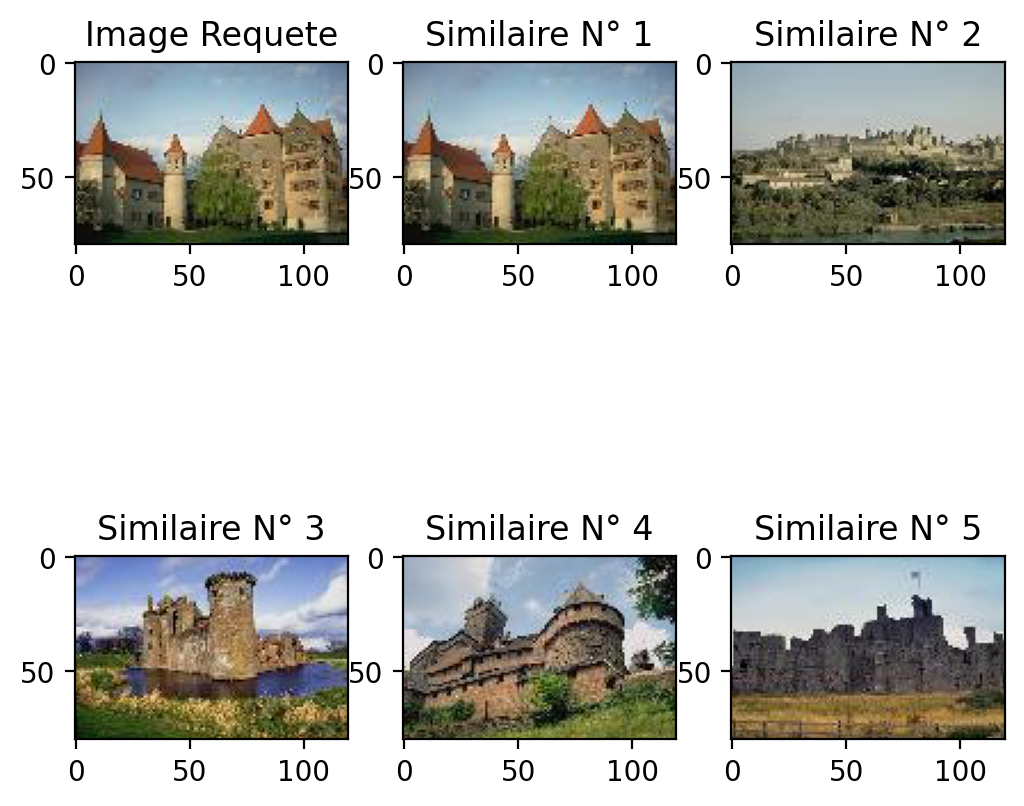

In [16]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[arraydistance[i]])
  ax1.set_title('Similaire N° %s' %(i+1))